# EDA of Bankruptcy Data and Building Random Forest Classifier, Gradient Boosted Trees, and Extra Trees

The goal is to explore the new data set and build three models (using an 80/20 train/test split) to predict bankruptcy of a firm.

In [14]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier

## Ingest

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jhancuch/bankruptcy-trees-bagging-boosting/main/data/data.csv')

In [12]:
data.shape

(6819, 96)

In [13]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [15]:
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [16]:
data.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6814                                      0.303510  ...   
6815                                      0.303520  ...   
6816                                      0.303512  ...   
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6814                     0.799927                    0.000466   
6815                     0.799748                    0.001959   
6816                     0.797778                    0.002840   
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6814             0.623620                0.604455   
6815             0.623931                0.598306   
6816             0.624156                0.610441   
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6814                             0.840359              0.279606   
6815                             0.840306              0.278132   
6816                             0.840138              0.275789   
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6814                             0.027064   
6815                             0.027009   
6816                             0.026791   
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6814                                           0.566193                   1   
6815                 

In [17]:
data.iloc[:, 0].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

## EDA

### Dependent Variable

Dependent Variable Summary Statistics:
count    6819.000000
mean        0.032263
std         0.176710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Bankrupt?, dtype: float64

Dependent Variable Median: 0.0
Dependent Variable Mean: 0.03226279513125092



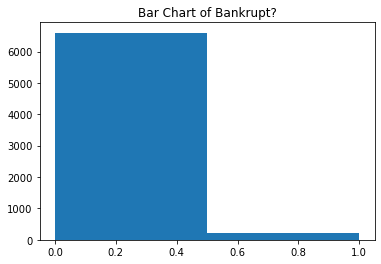

In [18]:
print('Dependent Variable Summary Statistics:\n{0}\n'.format(data['Bankrupt?'].describe()))
print('Dependent Variable Median: {0}'.format(data['Bankrupt?'].median()))
print('Dependent Variable Mean: {0}\n'.format(data['Bankrupt?'].mean()))

plt.hist(data['Bankrupt?'], bins = 2)
plt.title("Bar Chart of Bankrupt?")
plt.show()

### Independent Variables

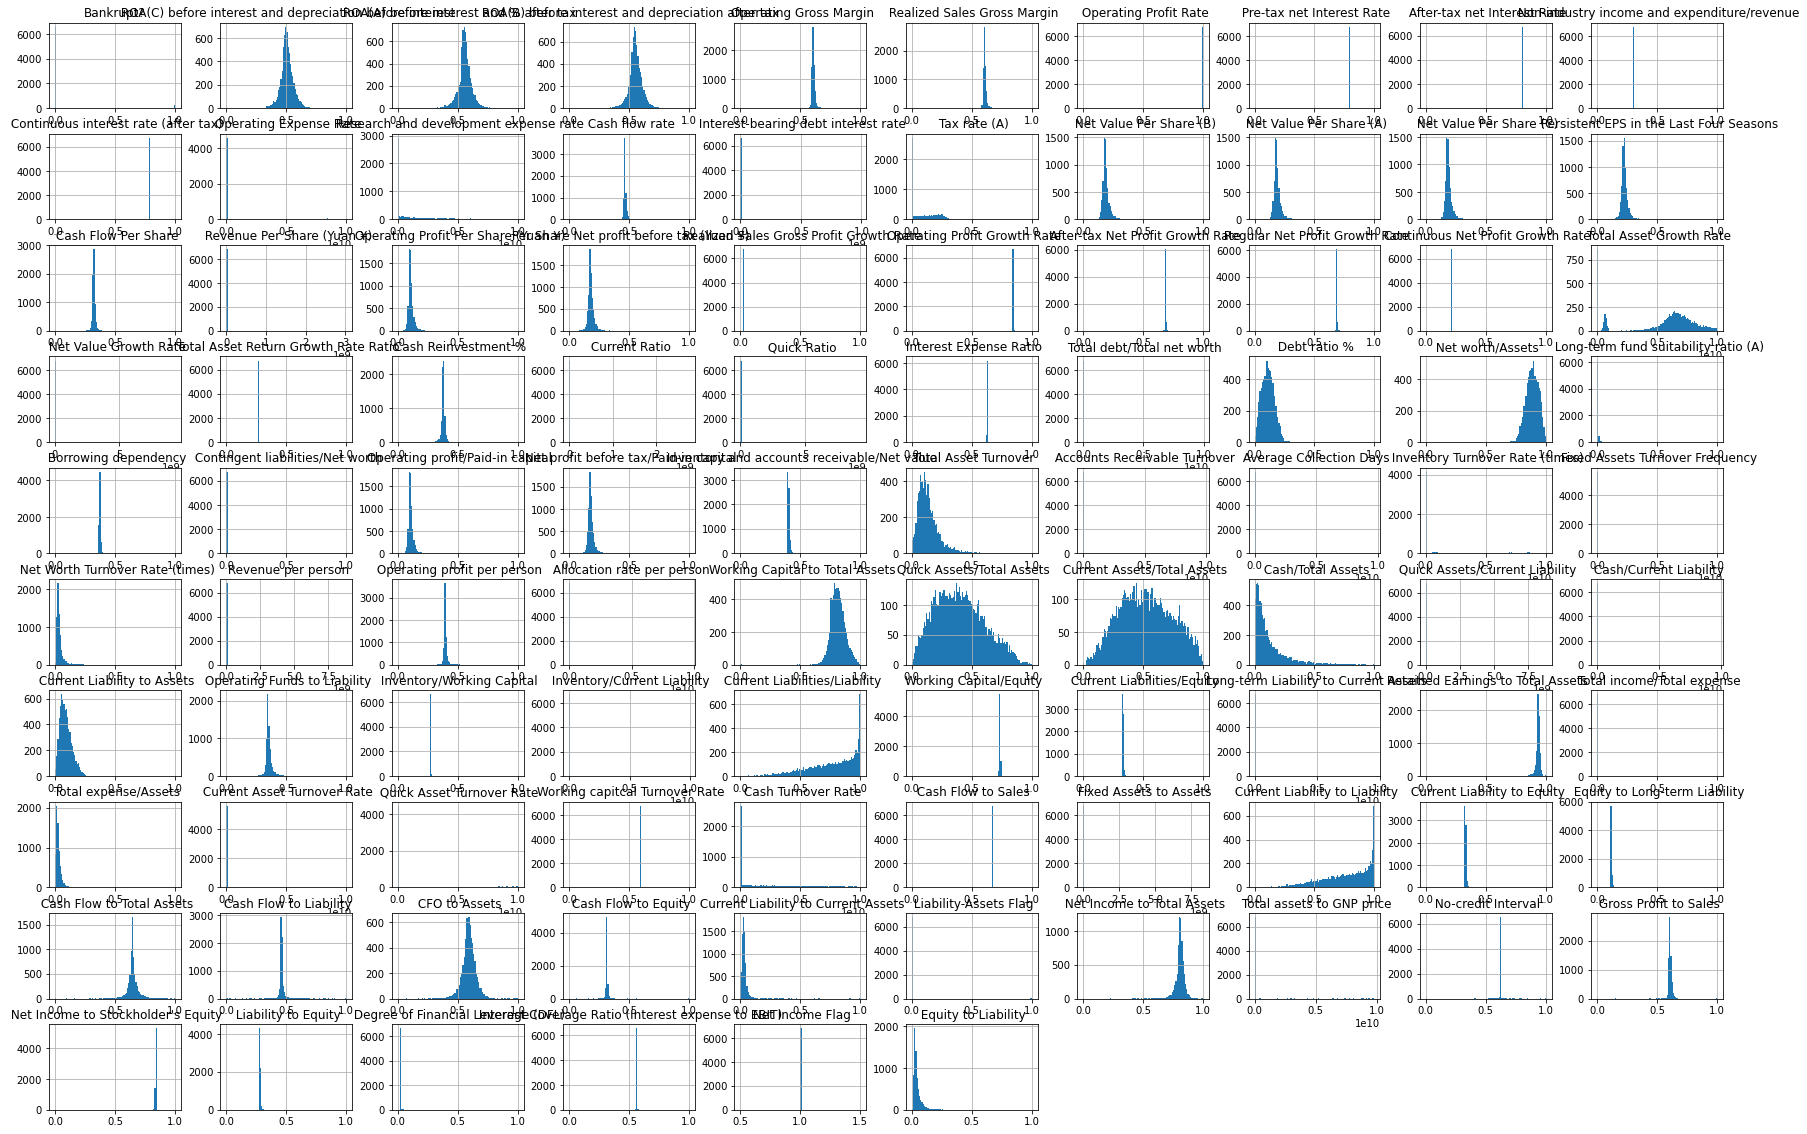

In [19]:
data.hist(bins = 100, figsize = (30, 20))
plt.show()

### Relationship between Bankruptcy? and Independent Variables

#### Scatter plot output

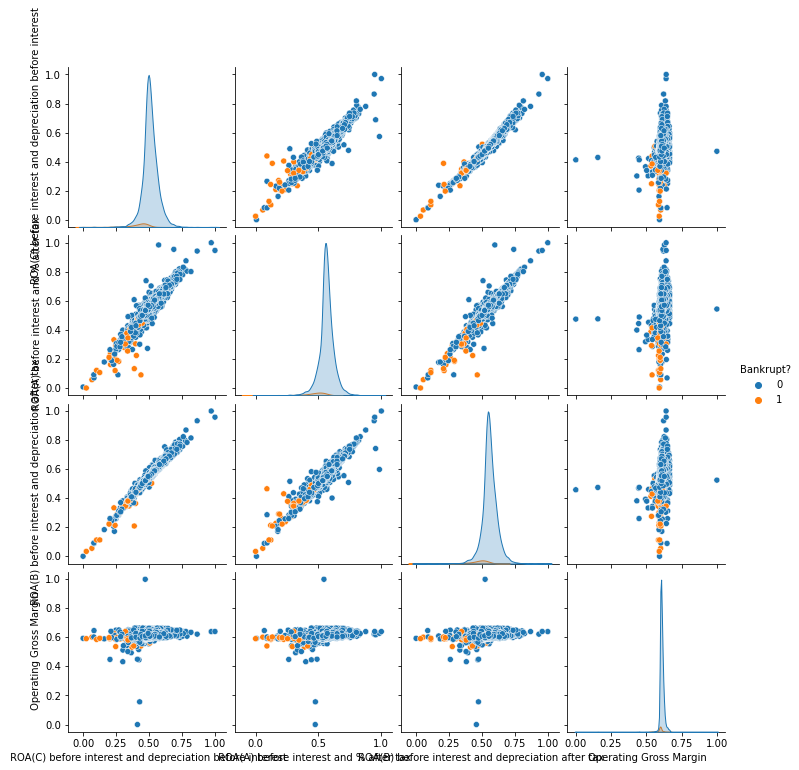

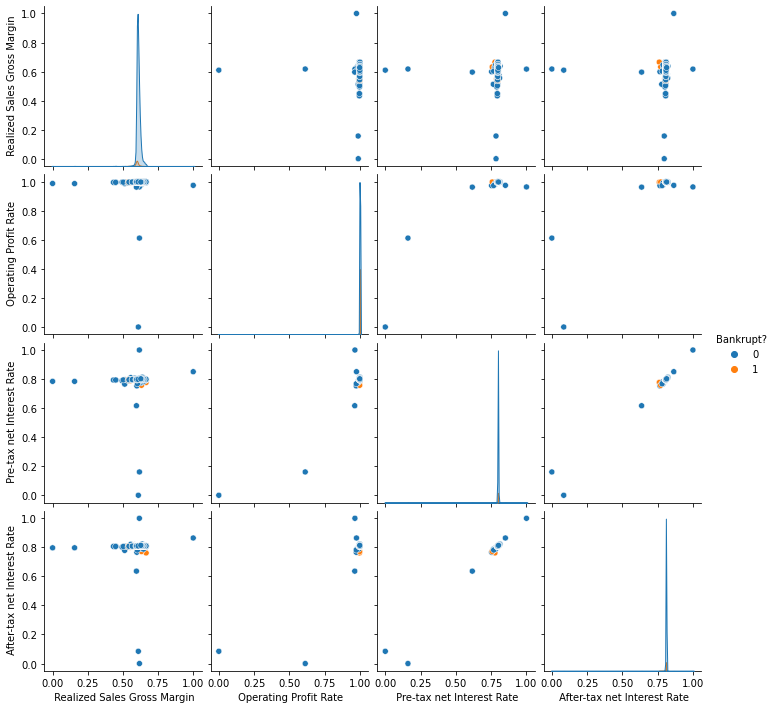

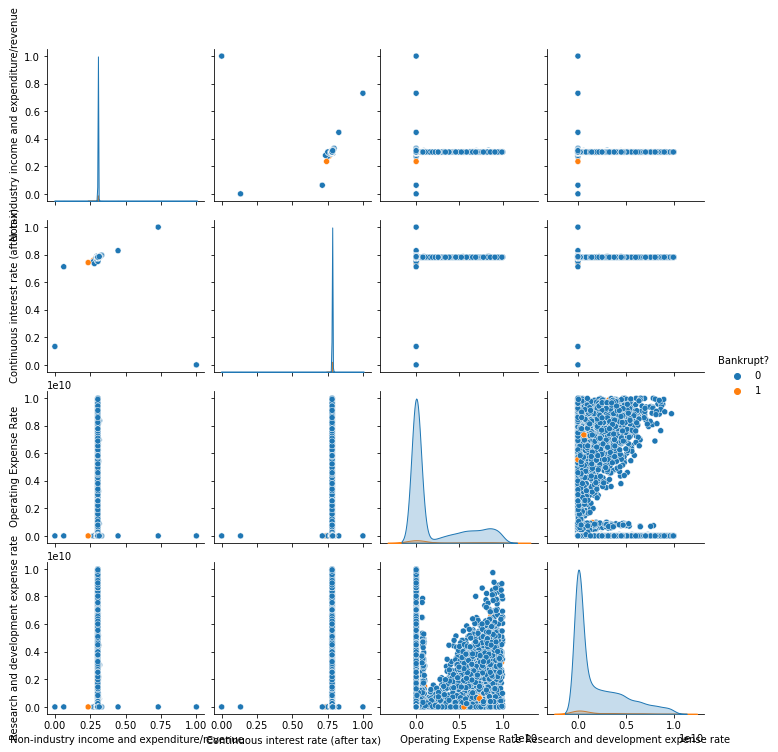

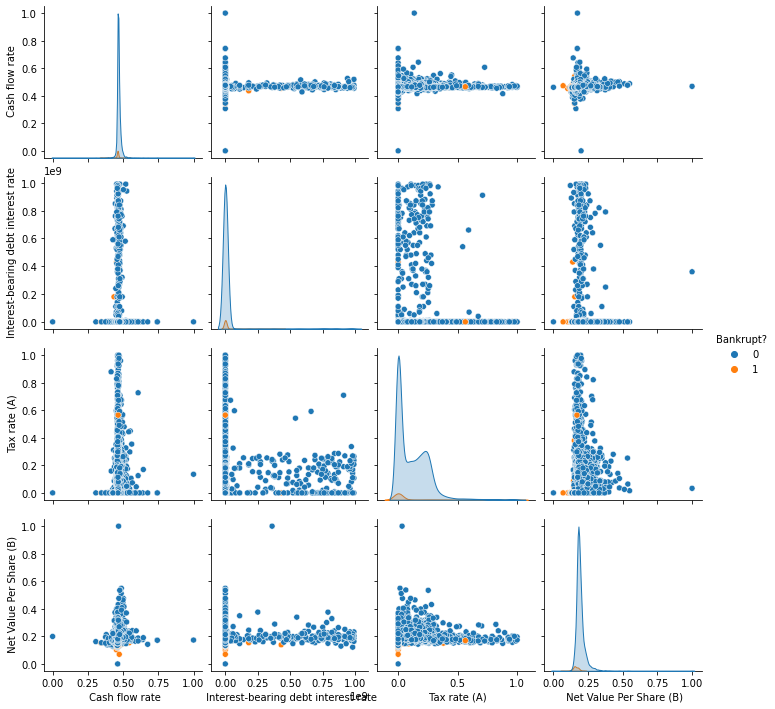

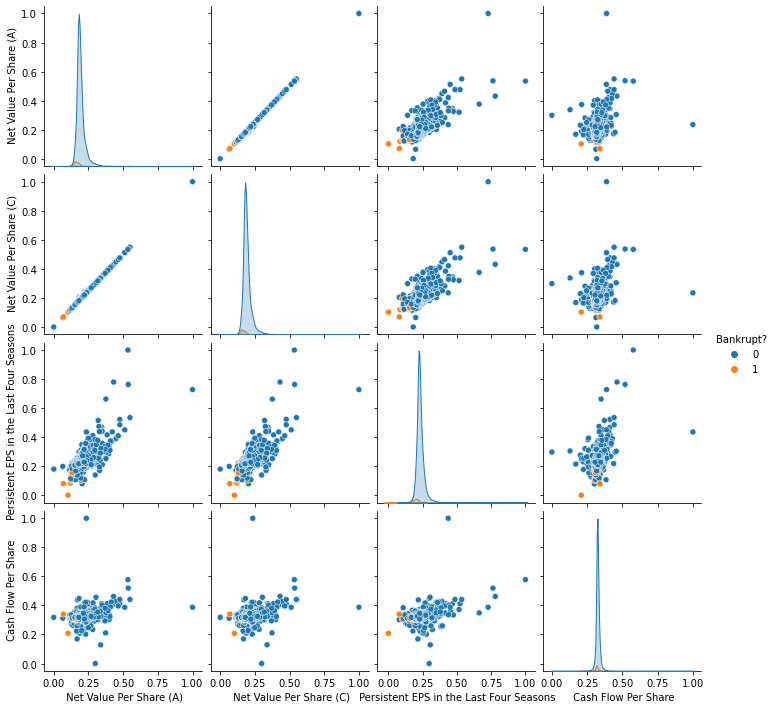

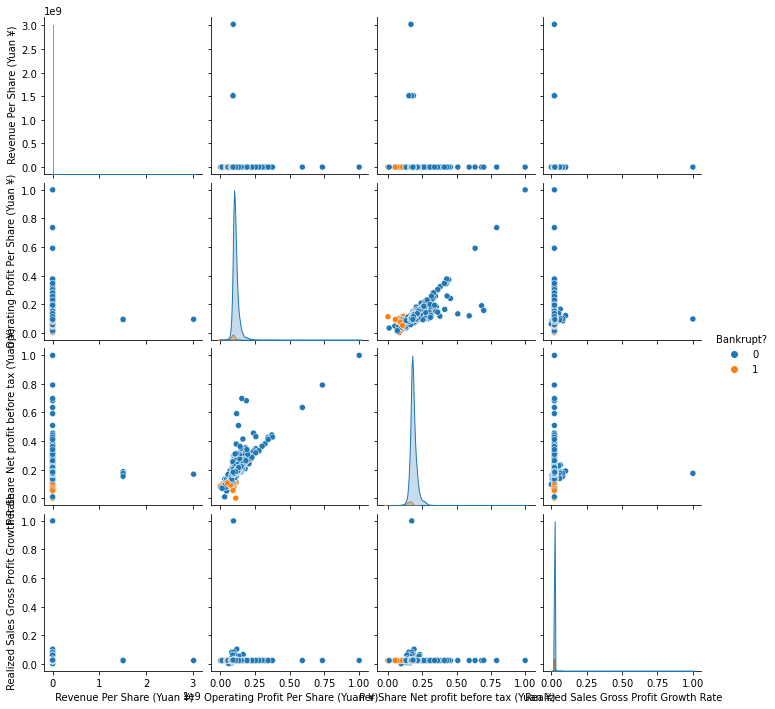

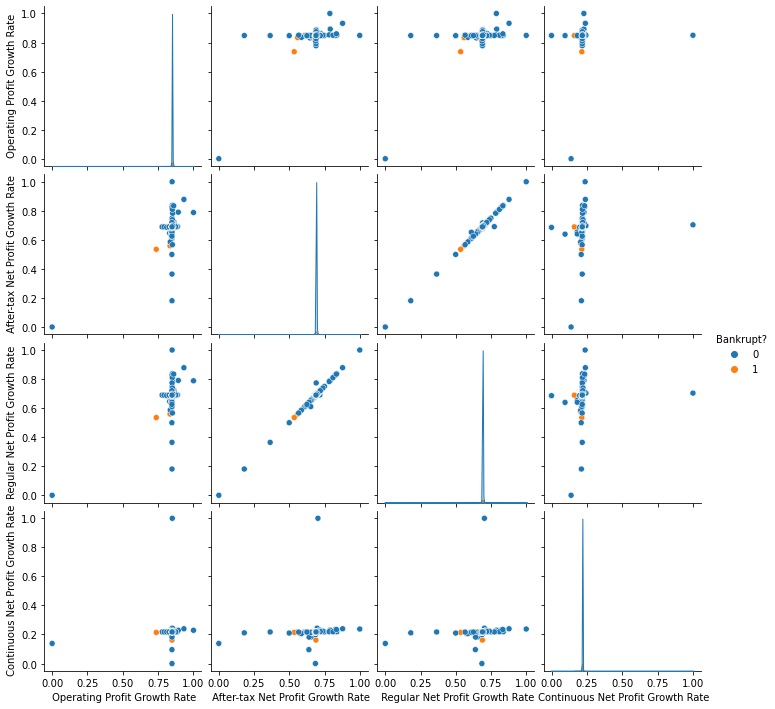

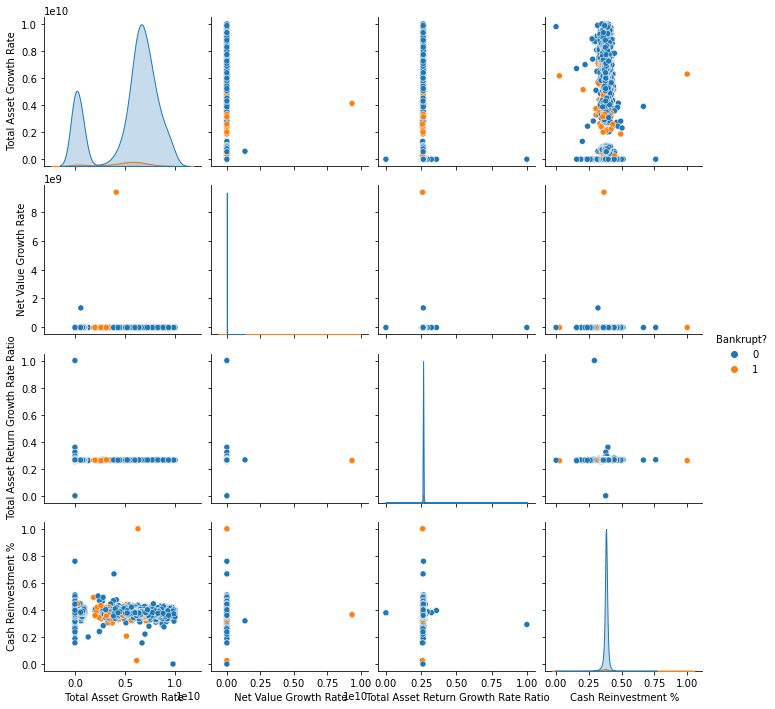

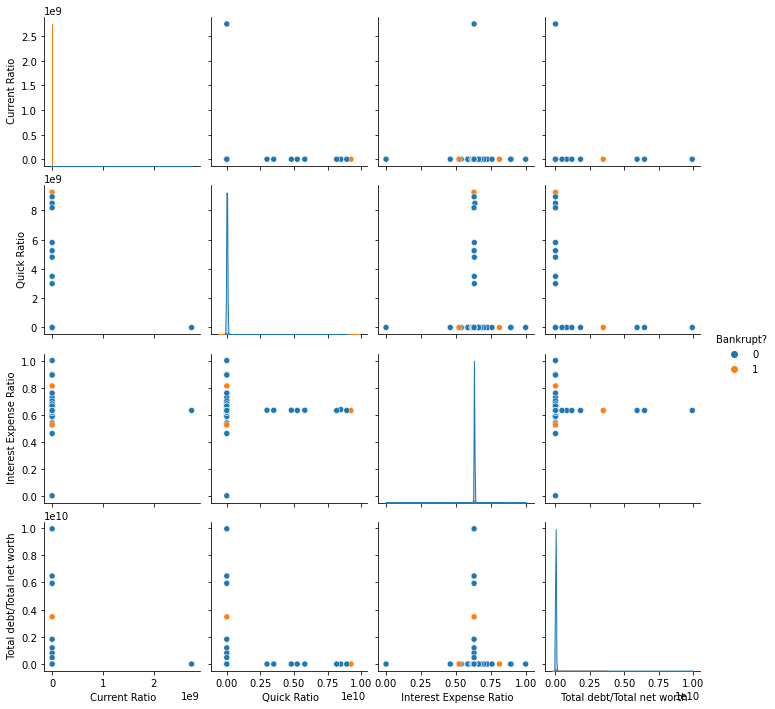

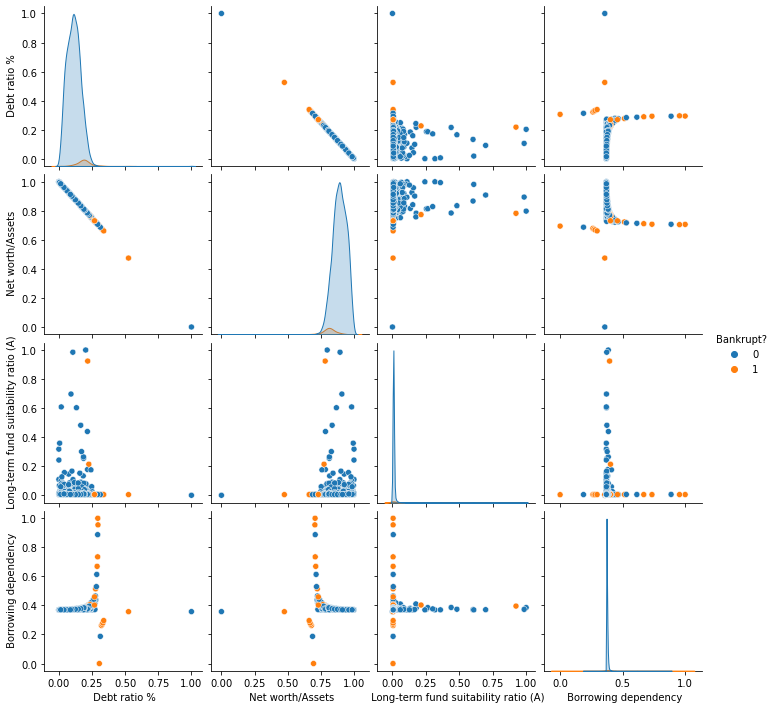

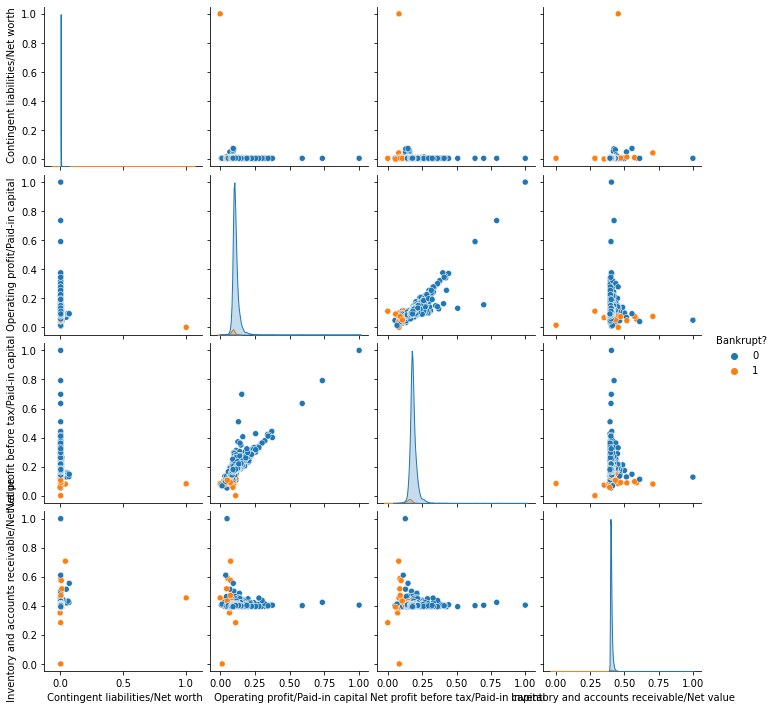

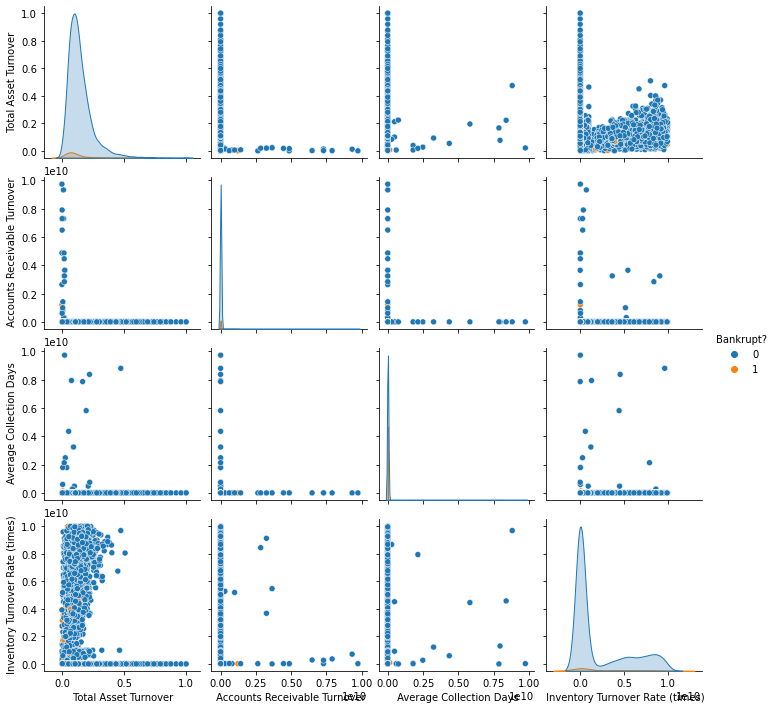

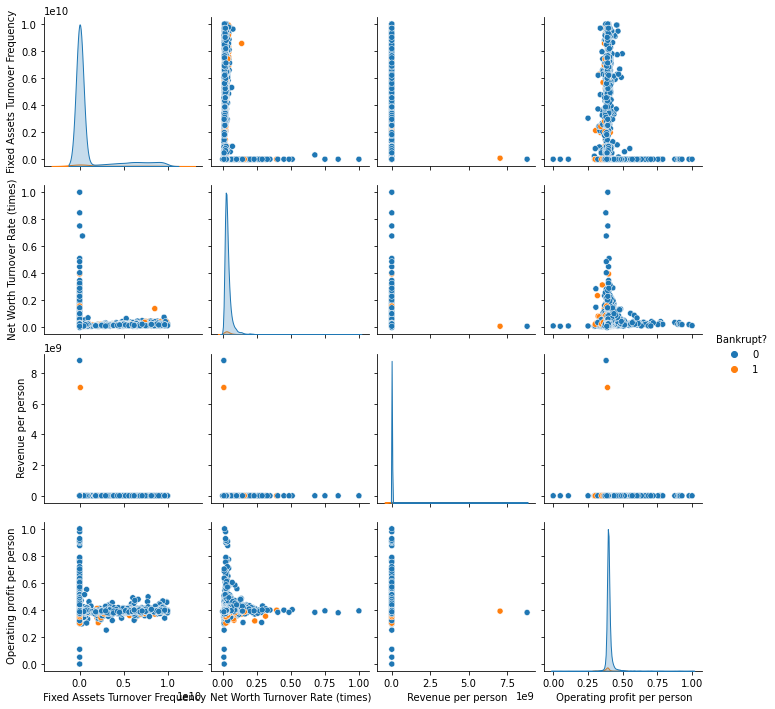

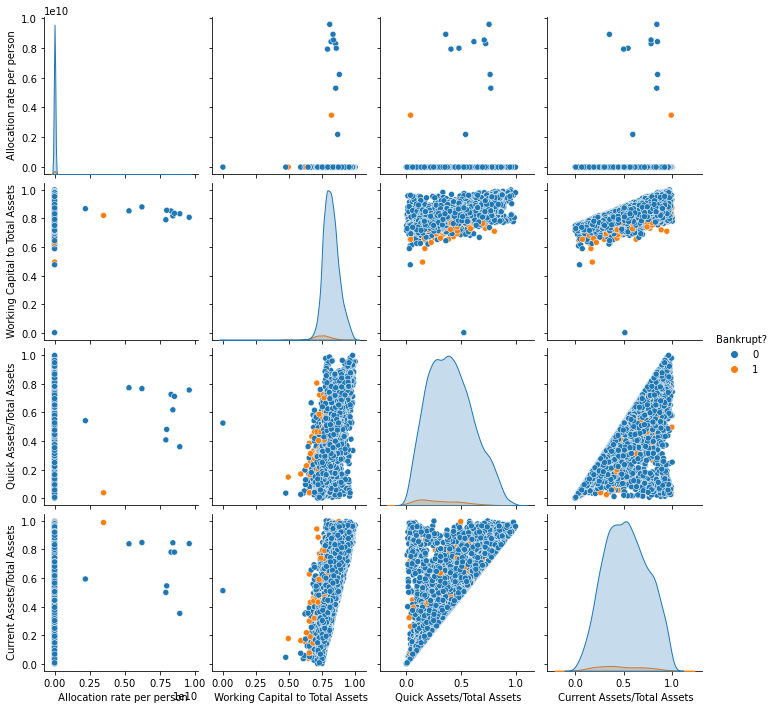

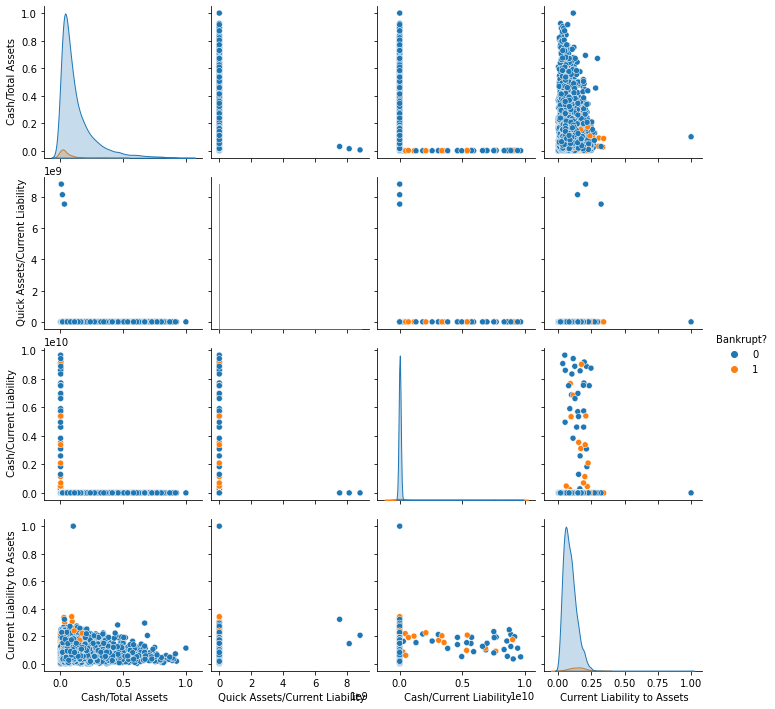

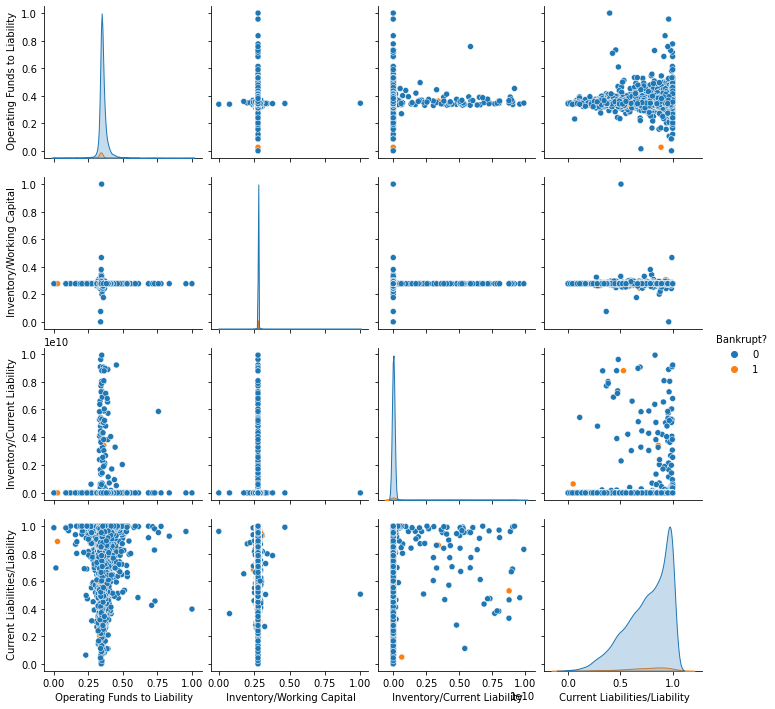

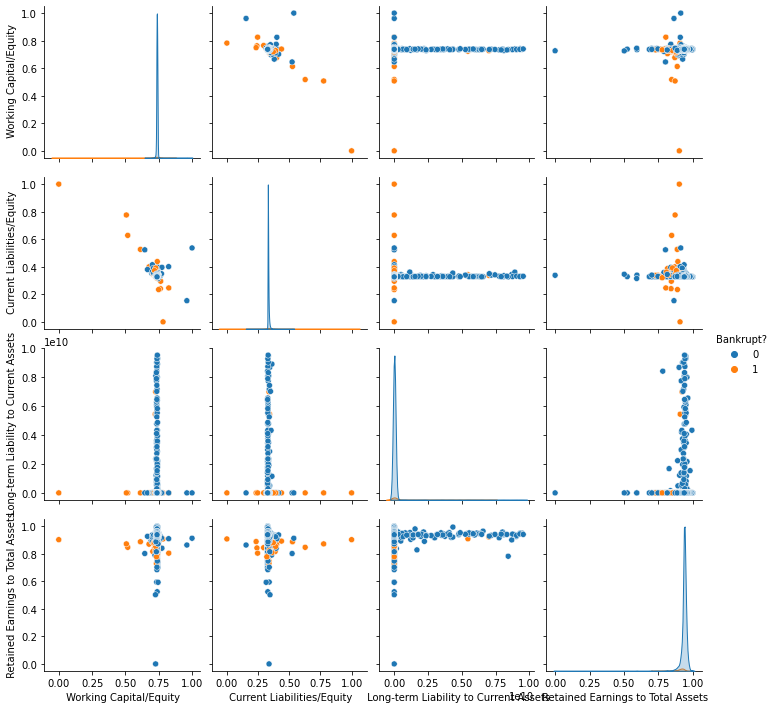

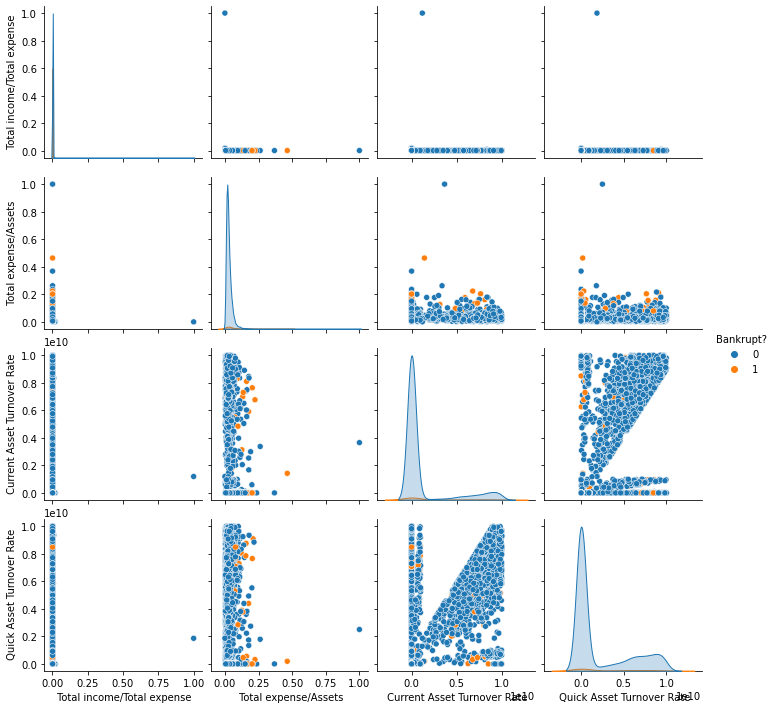

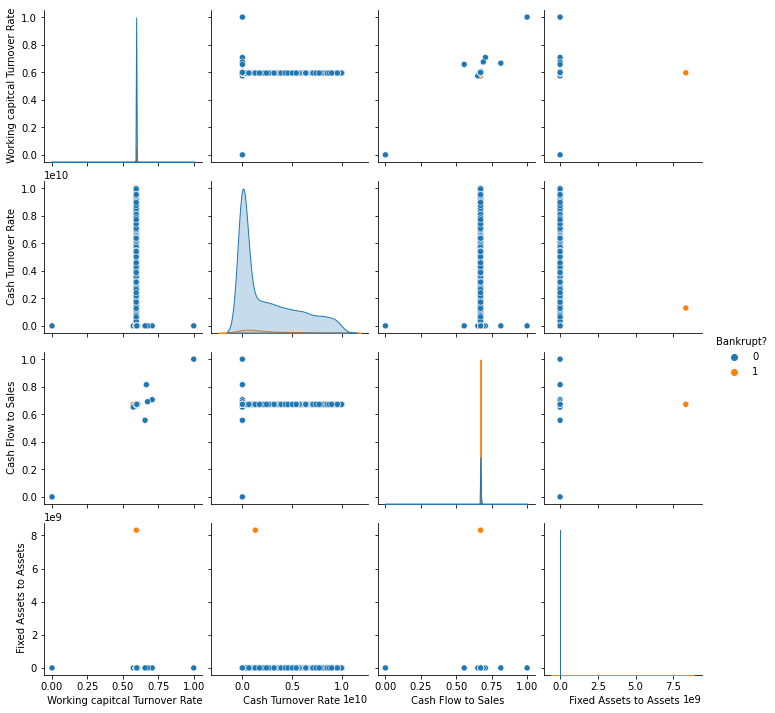

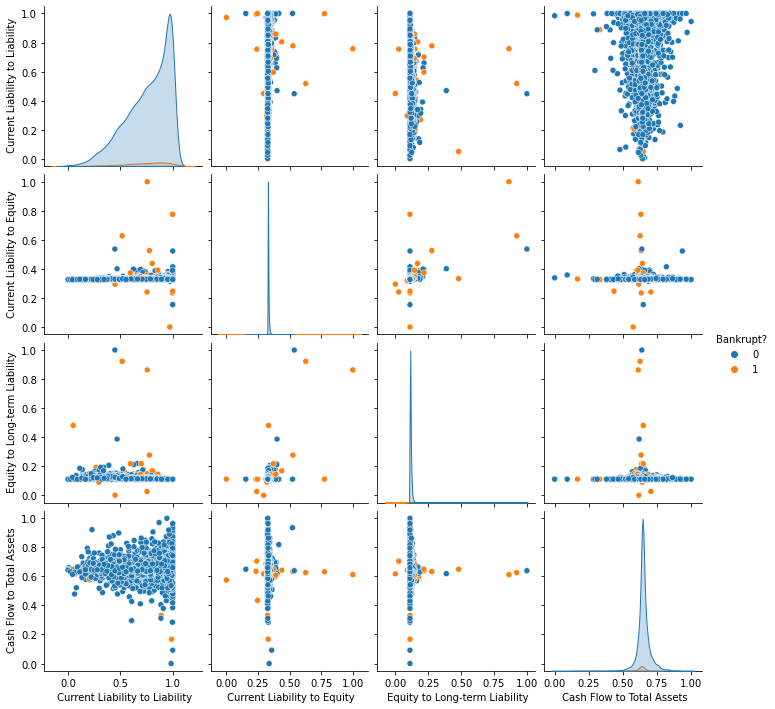

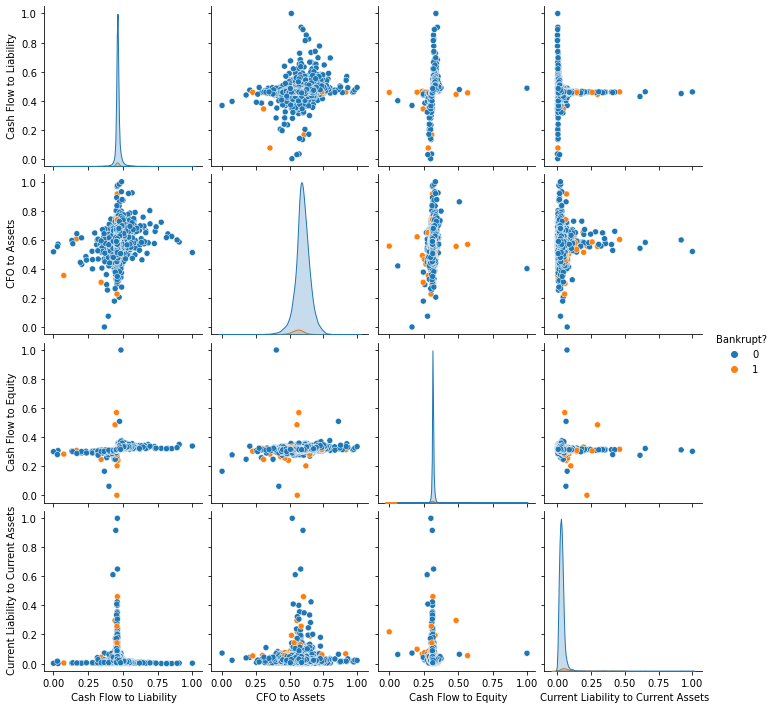

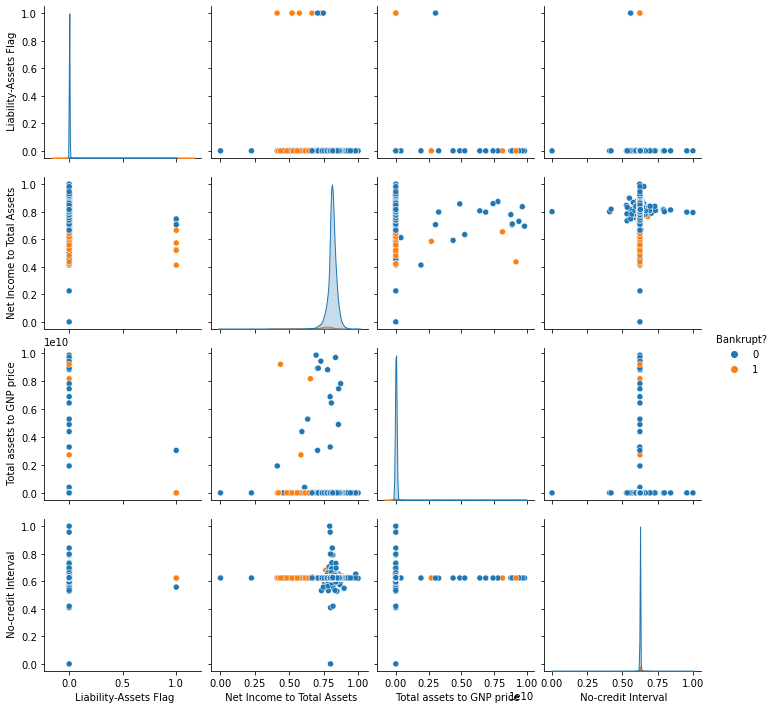

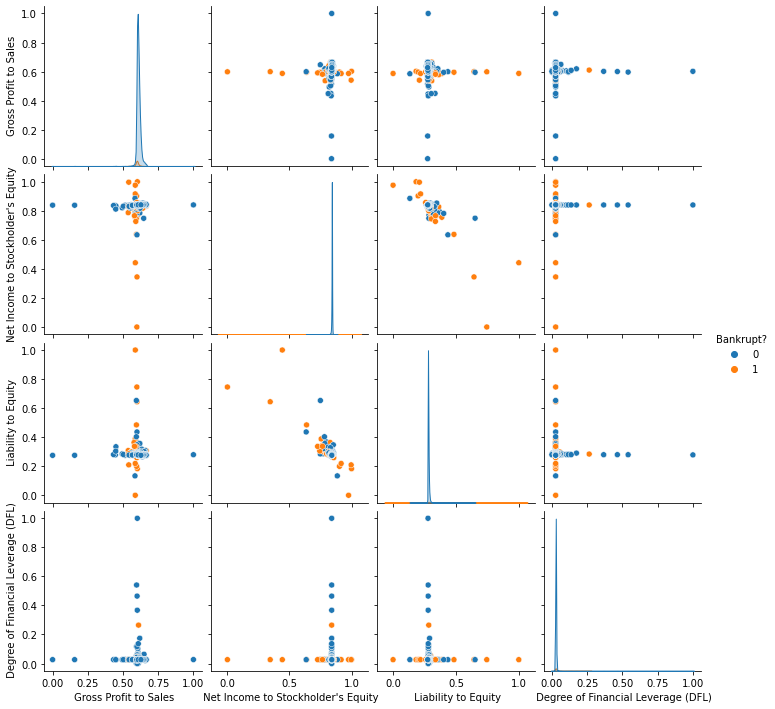

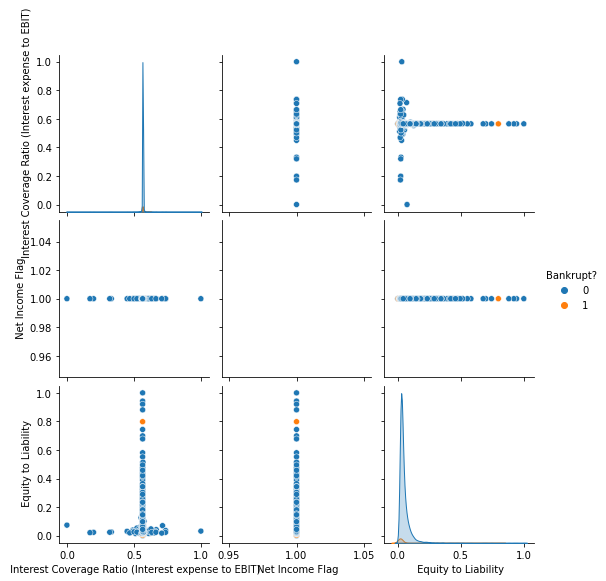

In [21]:
for i in range(1, len(data), 4):
    end = i + 4
    temp = data.iloc[:, i:end].merge(data.iloc[:, 0], how='left', left_index=True, right_index=True)
    if len(temp.columns) == 1:
        break
    sns.pairplot(data=temp, hue="Bankrupt?")
    plt.show()

#### Heat map correlation output

In [22]:
dependent_var = data[['Bankrupt?']]

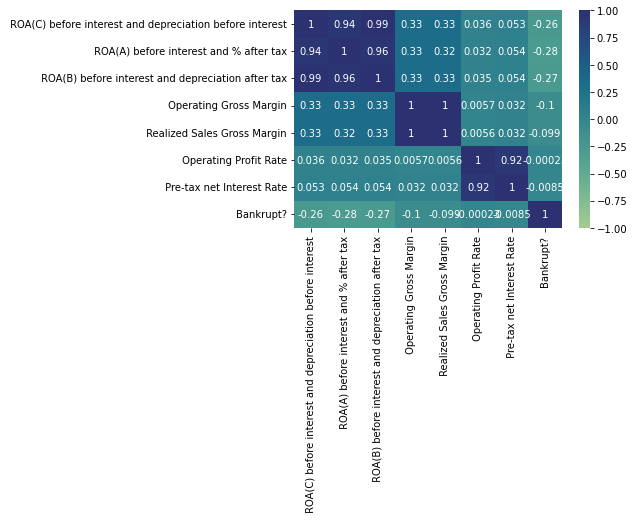

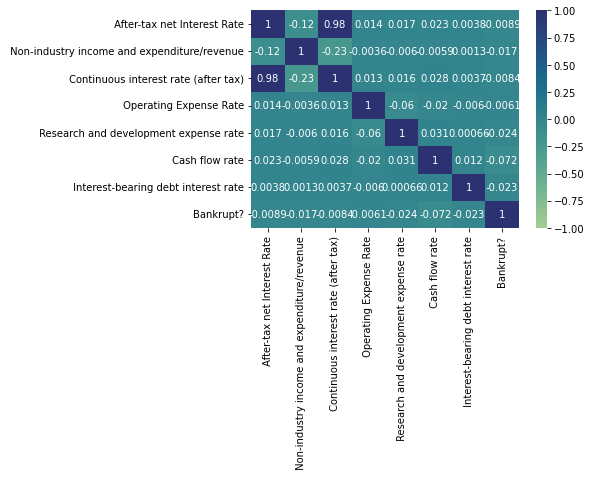

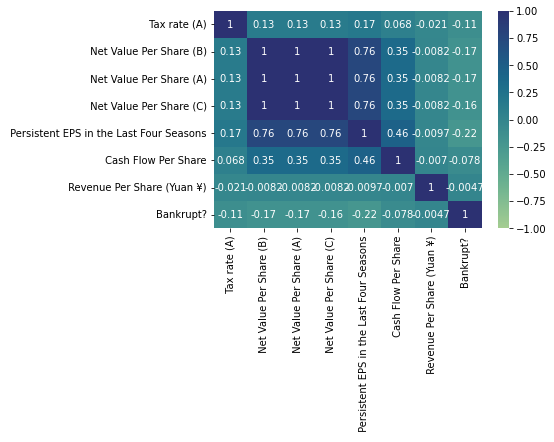

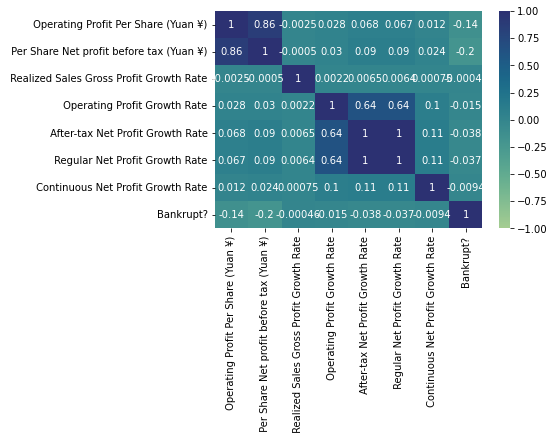

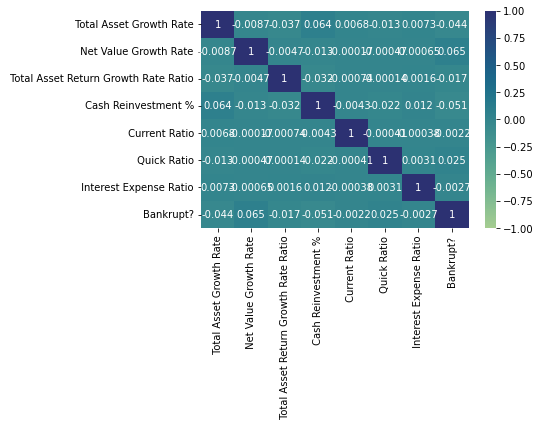

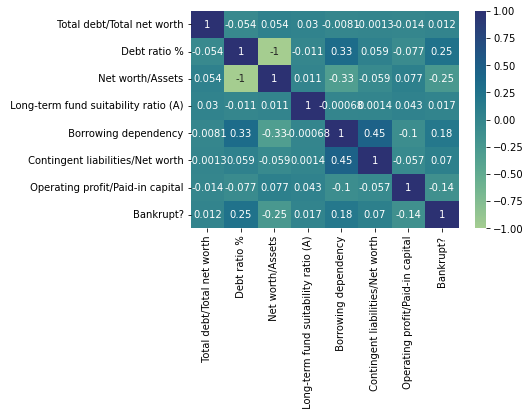

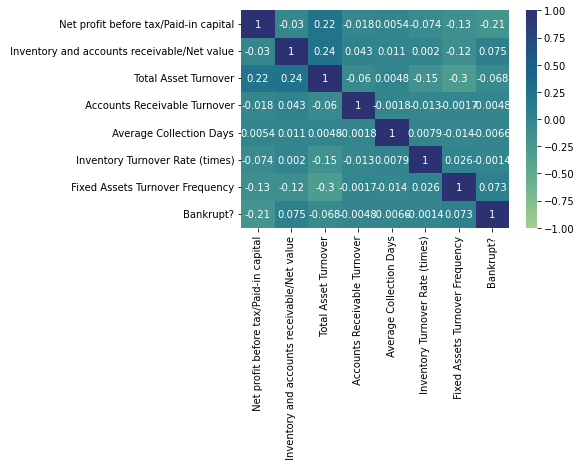

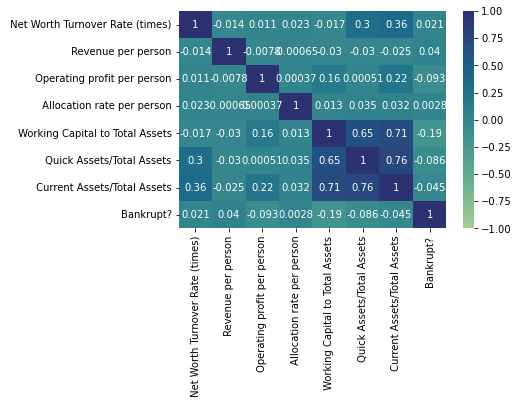

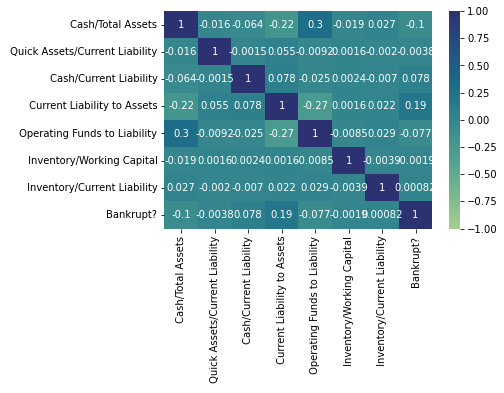

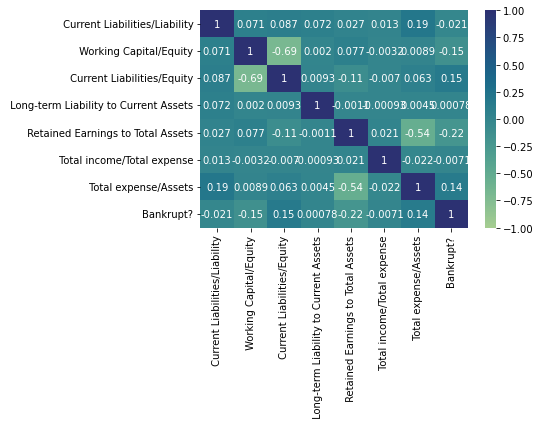

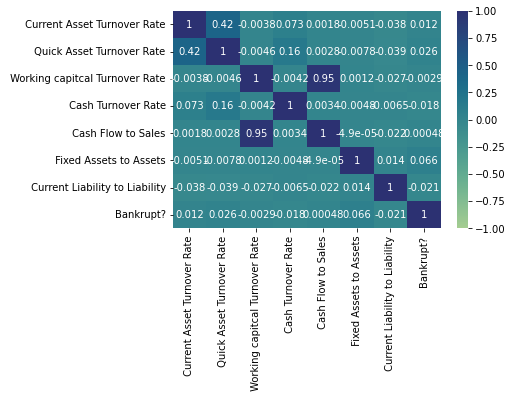

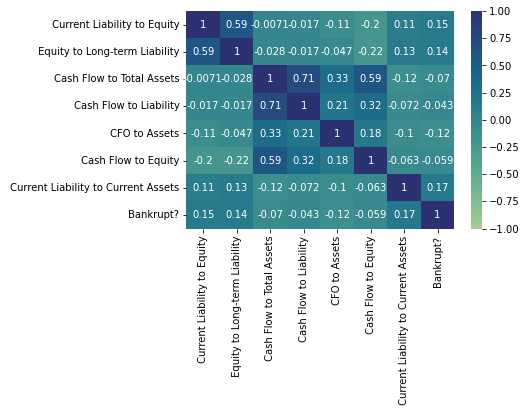

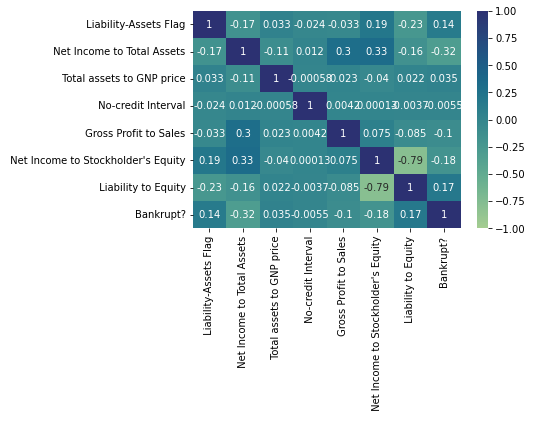

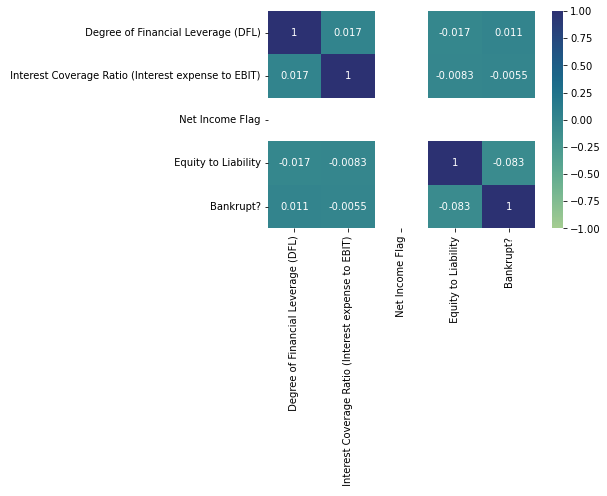

In [25]:
for i in range(1, len(data), 7):
    last = i + 7
    temp1 = data.iloc[:, i:last].merge(dependent_var, how='inner', left_index=True, right_index=True)
    if len(temp1.columns) == 1:
        break
    sns.heatmap(temp1.corr(), vmin = -1, vmax = 1, annot=True, cmap = 'crest')
    plt.show()

## Preprocessing 

subset correlated variables so I two datasets, then make sure I create a pipeline to scale and do grid search and input into final model

In [9]:
data_subset = data[['Bankrupt?', ' ROA(C) before interest and depreciation before interest',' ROA(A) before interest and % after tax',
                    ' ROA(B) before interest and depreciation after tax', ' Tax rate (A)',' Net Value Per Share (B)', ' Net Value Per Share (C)', 
                    ' Net Value Per Share (A)', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)',
                    ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Operating profit/Paid-in capital',
                    ' Net profit before tax/Paid-in capital', ' Working Capital to Total Assets', ' Current Liability to Assets',
                    ' Working Capital/Equity', ' Retained Earnings to Total Assets', ' Current Liability to Equity', ' Equity to Long-term Liability',
                    ' CFO to Assets', ' Current Liability to Current Assets', ' Liability-Assets Flag', ' Net Income to Total Assets', 
                    " Net Income to Stockholder's Equity", ' Liability to Equity']]

In [12]:
X_train, X_validation, y_train, y_validation = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size=0.2, random_state=123)

In [13]:
X_train_subset, X_validation_subset, y_train_subset, y_validation_subset = train_test_split(data_subset.iloc[:, 1:], data_subset.iloc[:, 0], 
                                                                                            test_size=0.2, random_state=123)

## Models

### Random Forest

commentary

In [33]:
rf_pipe = Pipeline([("scaler", StandardScaler()), ("model", RandomForestClassifier())])

#### Hyperparameter tuning

commentary

In [35]:
rf_params = {'model__n_estimators': [50, 75, 100, 125, 150],
             'model__criterion': ['entropy', 'gini'],
             'model__max_features': [None, 'auto', 'sqrt', 'log2'],
             'model__max_depth': [None, 10, 25, 50, 100, 200]}

In [ ]:
rf_search = GridSearchCV(estimator=rf_pipe, param_grid=rf_params, scoring = 'roc_auc', n_jobs=2)
rf_search.fit(X_train, y_train)

In [ ]:
print("Best parameter (CV score=%0.3f):" % rf_search.best_score_)
print(rf_search.best_params_)

commentary

In [ ]:
rf_search = GridSearchCV(rf_pipe, rf_params, n_jobs=2)
rf_search.fit(X_train_subset, y_test_subset)

In [ ]:
print("Best parameter (CV score=%0.3f):" % rf_search.best_score_)
print(rf_search.best_params_)

#### Fitted Model

### Gradient Boosted Trees

### Extra Trees

## Conclusion